# Paths in AC/DC Subcircuits from Verd 2019 -- Fully Connected (E)

From the actual collected data, I took all the crossings of gene expression levels (where one epression level drops below another) for data from T8. Below is a table describing what is observed in T8 inbetween each crossing. However, in realtion to the network, the actual fixed points here may very.

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 35 - 37 | * | H | L | 0 |
| 37 - 40 | H | * | L | 0 |
| 40 - 45 | H | L | * | 0 |
| 45 - 47 | * | L | H | 0 |
| 47 - 51 | * | 0 | H | L |
| 51 - 57 | L | 0 | H | * |
| 57 - 61 | L | 0 | * | H |
| 61 - 63 | 0 | L | * | H |
| 63 - 67 | 0 | * | L | H |
| 67 - 72 | 0 | H | L | * |

*: Gene must be 'on', but it is unknown how many thresholds the gene expression is above (if any),

H: Gene is above all of its thresholds

L: Gene is above one threshold but not above all,

0: Gene expression is off. 

In [76]:
import DSGRN
from DSGRN import *

import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *
from stats import *

Initally, I want to to search for each fixed point individually in a fully connected version of the AC/DC subcircuits described in the Verd 2019 paper. 

In [3]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_FullconnE.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_FullconnE")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

38416


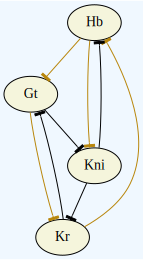

In [4]:
DrawGraph(network)

Lets consider H = 2, * = [0,1], L = 0. If a FP DNE, then change L =1.

In [72]:
AP35 = {"Hb":[0,2], "Gt":2, "Kr":0, "Kni":0}
AP37 = {"Hb":2, "Gt":[0,1], "Kr":0, "Kni":0}
AP40 = {"Hb":2, "Gt":1, "Kr":[0,1], "Kni":0} #edit
AP45 = {"Hb":[0,1], "Gt":1, "Kr":2, "Kni":0} #edit
AP47 = {"Hb":[0,1], "Gt":0, "Kr":2, "Kni":0} 
AP51 = {"Hb":1, "Gt":0, "Kr":2, "Kni":[0,1]} #edit
AP57 = {"Hb":1, "Gt":0, "Kr":[0,1], "Kni":2} #edit
AP61 = {"Hb":0, "Gt":0, "Kr":[0,1], "Kni":2}
AP63 = {"Hb":0, "Gt":[0,1], "Kr":1, "Kni":2} #edit
AP67 = {"Hb":0, "Gt":2, "Kr":1, "Kni":[0,1]} #edit

In [99]:
%%capture
D = [[AP37], [AP40], [AP45], [AP47], [AP51], [AP57], [AP61], [AP63], [AP67]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [100]:
M

[[31237, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [12078, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31285, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31629, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31284, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31287, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31293, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [21682, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31286, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12421, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12077, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [2474, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12079, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12076, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12085, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12029, 12078, 16

In [175]:

L = []
for i in range(len(M[0])):
    F={}
    for item in M:
        if item[i] in F:
            F[item[i]] += 1
        else:
            F[item[i]] = 1
    L.append(F.copy())
L

[{31237: 1,
  12078: 1,
  31285: 1,
  31629: 1,
  31284: 1,
  31287: 1,
  31293: 1,
  21682: 1,
  31286: 3,
  12421: 3,
  12077: 2,
  2474: 2,
  12079: 2,
  12076: 2,
  12085: 2,
  12029: 2,
  22025: 1,
  31627: 1,
  31630: 1,
  31628: 1,
  31580: 1,
  31636: 1},
 {31286: 8, 12078: 16, 31629: 8},
 {36088: 8, 16880: 16, 36431: 8},
 {36081: 8, 16873: 16, 36424: 8},
 {36179: 8, 16971: 16, 36522: 8},
 {33778: 8, 14570: 16, 34121: 8},
 {33777: 8, 14569: 16, 34120: 8},
 {33775: 8, 14567: 8, 14912: 16},
 {24171: 8, 4963: 8, 5308: 16}]

In [101]:
len(M)

32

In [152]:
stats_on_Paths(M).total()

{31237: 1,
 31286: 11,
 36088: 8,
 36081: 8,
 36179: 8,
 33778: 8,
 33777: 8,
 33775: 8,
 24171: 8,
 12078: 17,
 31285: 1,
 31629: 9,
 31284: 1,
 31287: 1,
 31293: 1,
 21682: 1,
 16880: 16,
 16873: 16,
 16971: 16,
 14570: 16,
 14569: 16,
 14567: 8,
 4963: 8,
 12421: 3,
 12077: 2,
 2474: 2,
 12079: 2,
 12076: 2,
 12085: 2,
 12029: 2,
 14912: 16,
 5308: 16,
 22025: 1,
 36431: 8,
 36424: 8,
 36522: 8,
 34121: 8,
 34120: 8,
 31627: 1,
 31630: 1,
 31628: 1,
 31580: 1,
 31636: 1}

In [149]:
n = 7
c = database.conn.cursor()
PGlist = M[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',PGlist)
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [21682, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171]
Associated MGI: [(21682, 80), (24171, 26), (31286, 718), (33775, 1303), (33777, 1303), (33778, 887), (36081, 716), (36088, 471), (36179, 716)]


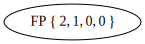

In [150]:
database.DrawMorseGraph(80) #37

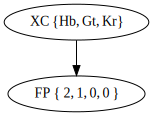

In [123]:
database.DrawMorseGraph(718) #40

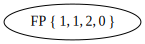

In [94]:
database.DrawMorseGraph(471) #45

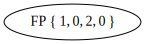

In [140]:
database.DrawMorseGraph(716) #47 #51

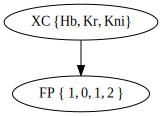

In [96]:
database.DrawMorseGraph(887) #57

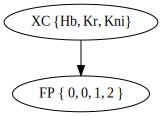

In [97]:
database.DrawMorseGraph(1303) #57 #61

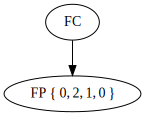

In [98]:
database.DrawMorseGraph(26) #67

Lets consider H = 2, * = [0,2], L = 0. If a FP DNE, then change L =1.

In [206]:
AP35 = {"Hb":[0,2], "Gt":2, "Kr":0, "Kni":0}
AP37 = {"Hb":2, "Gt":[0,2], "Kr":0, "Kni":0}
AP40 = {"Hb":2, "Gt":1, "Kr":[0,2], "Kni":0} #edit
AP45 = {"Hb":[0,2], "Gt":1, "Kr":2, "Kni":0} #edit
AP47 = {"Hb":[0,2], "Gt":0, "Kr":2, "Kni":0} 
AP51 = {"Hb":1, "Gt":0, "Kr":2, "Kni":[0,1]} #edit
AP57 = {"Hb":1, "Gt":0, "Kr":[0,2], "Kni":2} #edit
AP61 = {"Hb":0, "Gt":0, "Kr":[0,2], "Kni":2}
AP63 = {"Hb":0, "Gt":[0,2], "Kr":1, "Kni":2} #edit
AP67 = {"Hb":0, "Gt":2, "Kr":1, "Kni":[0,2]} #edit

In [207]:
%%capture
D = [[AP37], [AP40], [AP45], [AP47], [AP51], [AP57], [AP61], [AP63], [AP67]]
N = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [208]:
N

[[12078, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31285, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31300, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31293, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31237, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31629, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31284, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [31287, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [21682, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [12421, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12092, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12077, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12085, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12029, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [31286, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [2474, 12078, 1

In [221]:
R=N.copy()
for i in N:
    for j in M:
        if i==j:
            R.remove(j)

In [222]:
R

[[31300, 31286, 36088, 36081, 36179, 33778, 33777, 33775, 24171],
 [12092, 12078, 16880, 16873, 16971, 14570, 14569, 14567, 4963],
 [12092, 12078, 16880, 16873, 16971, 14570, 14569, 14912, 5308],
 [31643, 31629, 36431, 36424, 36522, 34121, 34120, 14912, 5308]]

In [227]:
n = 3
c = database.conn.cursor()
PGlist = R[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',PGlist)
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [31643, 31629, 36431, 36424, 36522, 34121, 34120, 14912, 5308]
Associated MGI: [(5308, 367), (14912, 723), (31629, 718), (31643, 589), (34120, 1359), (34121, 895), (36424, 716), (36431, 471), (36522, 716)]


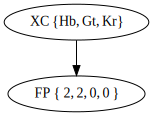

In [228]:
database.DrawMorseGraph(589)

I am interested in the above search for all L = 1

In [229]:
AP35 = {"Hb":[0,2], "Gt":2, "Kr":1, "Kni":0}
AP37 = {"Hb":2, "Gt":[0,2], "Kr":1, "Kni":0}
AP40 = {"Hb":2, "Gt":1, "Kr":[0,2], "Kni":0} 
AP45 = {"Hb":[0,2], "Gt":1, "Kr":2, "Kni":0} 
AP47 = {"Hb":[0,2], "Gt":0, "Kr":2, "Kni":1} 
AP51 = {"Hb":1, "Gt":0, "Kr":2, "Kni":[0,1]} 
AP57 = {"Hb":1, "Gt":0, "Kr":[0,2], "Kni":2} 
AP61 = {"Hb":0, "Gt":1, "Kr":[0,2], "Kni":2}
AP63 = {"Hb":0, "Gt":[0,2], "Kr":1, "Kni":2} 
AP67 = {"Hb":0, "Gt":2, "Kr":1, "Kni":[0,2]} 

In [230]:
%%capture
D = [[AP37], [AP40], [AP45], [AP47], [AP51], [AP57], [AP61], [AP63], [AP67]]
P = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [231]:
P

[]

Now I want to try L=0 if decreasing in the data and L=1 if increasing. However, below you will see that there are no paths for this. Interestingly, the paths found in 'M' is exactly the opposit of this. 

In [232]:
AP37 = {"Hb":2, "Gt":[0,2], "Kr":1, "Kni":0}
AP40 = {"Hb":2, "Gt":0, "Kr":[0,2], "Kni":0} 
AP45 = {"Hb":[0,2], "Gt":0, "Kr":2, "Kni":0} 
AP47 = {"Hb":[0,2], "Gt":0, "Kr":2, "Kni":1} 
AP51 = {"Hb":0, "Gt":0, "Kr":2, "Kni":[0,1]} 
AP57 = {"Hb":0, "Gt":0, "Kr":[0,2], "Kni":2} 
AP61 = {"Hb":0, "Gt":1, "Kr":[0,2], "Kni":2}
AP63 = {"Hb":0, "Gt":[0,2], "Kr":0, "Kni":2} 
AP67 = {"Hb":0, "Gt":2, "Kr":0, "Kni":[0,2]} 

In [235]:
%%capture
D = [[AP37], [AP40], [AP45], [AP47], [AP51], [AP57], [AP61], [AP63], [AP67]]
Q = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [236]:
Q

[]